# EFFECTIVE DATA VISUALIZATION IN DATA SCIENCE WITH MATPLOTLIB AND SEABORN

## CODING TASK #1. PLOT PIE CHART USING MATPLOTLIB

- **The plot method on Pandas Series and DataFrames is just a simple wrapper around plt.plot():**
- **Define a Pandas Dataframe with all crypto allocation in a given portfolio**
- **Note that total sum = 100%** 
- **Use matplotlib to plot a pie chart** 

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
warnings.warn("thisnwill not show")

pd.options.display.max_columns=50

In [91]:
crypto_df = pd.DataFrame(data= {'allocation_rate' : [20, 55, 5, 17, 3]}, index = ['BTC', 'ETH', 'LTC', 'XRP', 'ADA'])
crypto_df

allocation_rate
BTC               20
ETH               55
LTC                5
XRP               17
ADA                3

<Figure size 1000x1000 with 0 Axes>

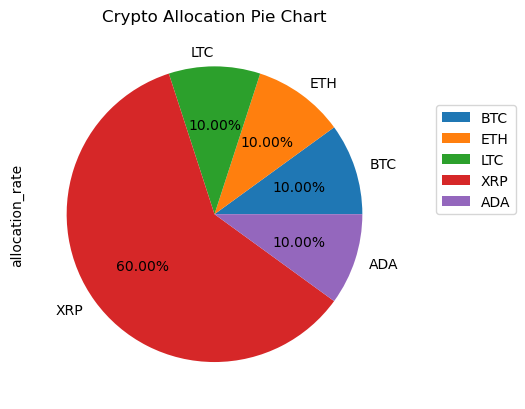

In [159]:
#1st way

plt.figure(figsize=(10,10))

crypto_df.plot.pie(y= "allocation_rate", autopct= "%1.2f%%")

plt.title("Crypto Allocation Pie Chart")

plt.legend(loc=(1.1,.5))

plt.show();

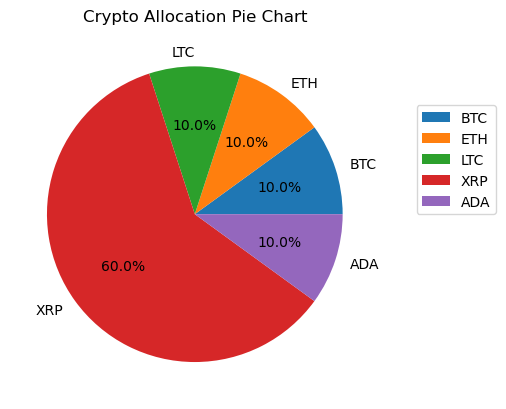

In [158]:
#2nd way

plt.pie(crypto_df['allocation_rate'].values, labels= crypto_df.index.values, autopct= "%1.1f%%")

plt.title("Crypto Allocation Pie Chart")

plt.legend(loc=(1.1,.5))
plt.show()

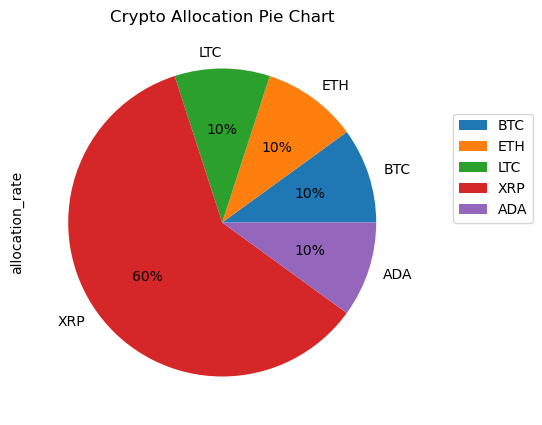

In [161]:
#3rd way

crypto_df.plot.pie(y='allocation_rate', figsize=(5, 5), autopct="%.f%%")

plt.title("Crypto Allocation Pie Chart")

plt.legend(loc=(1.1,.5));

In [93]:
total = crypto_df["allocation_rate"].sum()
total

100

**PRACTICE OPPORTUNITY #1:**
- **Assume that you became bullish on XRP and decided to allocate 60% of your assets in it. You also decided to equally divide the rest of your assets in other coins (BTC, LTC, ADA, and ETH). Change the allocations and plot the pie chart.**
- **Use 'explode' to increase the separation between XRP and the rest of the portfolio (External Research is Required)**

In [94]:
crypto_df['allocation_rate']['XRP'] = crypto_df['allocation_rate'].sum()*0.60

In [95]:
crypto_df

allocation_rate
BTC               20
ETH               55
LTC                5
XRP               60
ADA                3

In [96]:
crypto_df['allocation_rate']['ETH']=crypto_df['allocation_rate']['LTC']=\
crypto_df['allocation_rate']['BTC']=crypto_df['allocation_rate']['ADA']=\
(total-crypto_df['allocation_rate']['XRP'])/ (len(crypto_df['allocation_rate'])-1)

In [97]:
crypto_df

allocation_rate
BTC               10
ETH               10
LTC               10
XRP               60
ADA               10

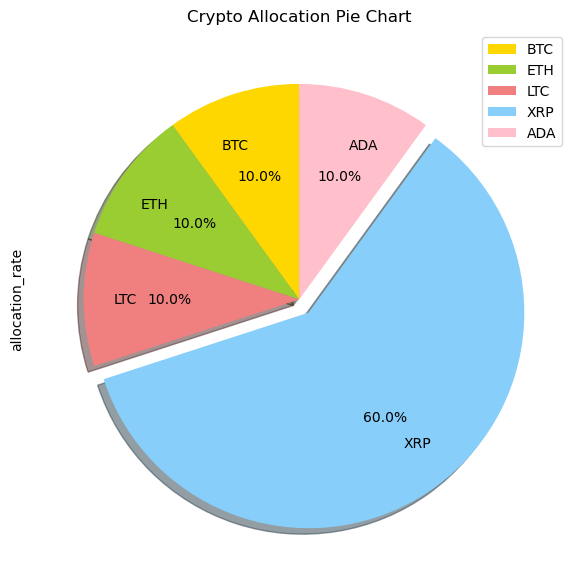

In [152]:
explode = [0,0,0,.075,0]
color_list = ["gold", "yellowgreen", "lightcoral", "lightskyblue", "pink"]

crypto_df.plot.pie(y= "allocation_rate",figsize= (7,7),explode=explode, colors= color_list, autopct= "%1.1f%%",
                   startangle= 90, labeldistance=.75, shadow=True, )

plt.title("Crypto Allocation Pie Chart")

plt.legend(loc=("best"))

plt.show();

## CODING TASK #2. PLOT SINGLE & MULTIPLE LINE PLOTS USING MATPLOTLIB
- **Use Pandas read_csv to read crypto_daily_prices (BTC, ETH, and LTC)**
- **Use matplotlib on the Pandas DataFrame to plot the data**

In [99]:
investments_df = pd.read_csv('crypto_daily_prices.csv')
investments_df

Date           BTC          ETH       ADA
0     9/17/2014    457.334015          NaN       NaN
1     9/18/2014    424.440002          NaN       NaN
2     9/19/2014    394.795990          NaN       NaN
3     9/20/2014    408.903992          NaN       NaN
4     9/21/2014    398.821014          NaN       NaN
...         ...           ...          ...       ...
2828  6/15/2022  22572.839840  1233.206421  0.533296
2829  6/16/2022  20381.650390  1067.730713  0.475022
2830  6/17/2022  20471.482420  1086.519287  0.487392
2831  6/18/2022  19017.642580   993.636780  0.456182
2832  6/19/2022  19488.886720  1040.510254  0.464109

[2833 rows x 4 columns]

In [100]:
# import matplotlib.pyplot as plt

In [182]:
investments_df["Date"] = pd.to_datetime(investments_df.Date)

In [183]:
investments_df.set_index("Date", inplace=True)

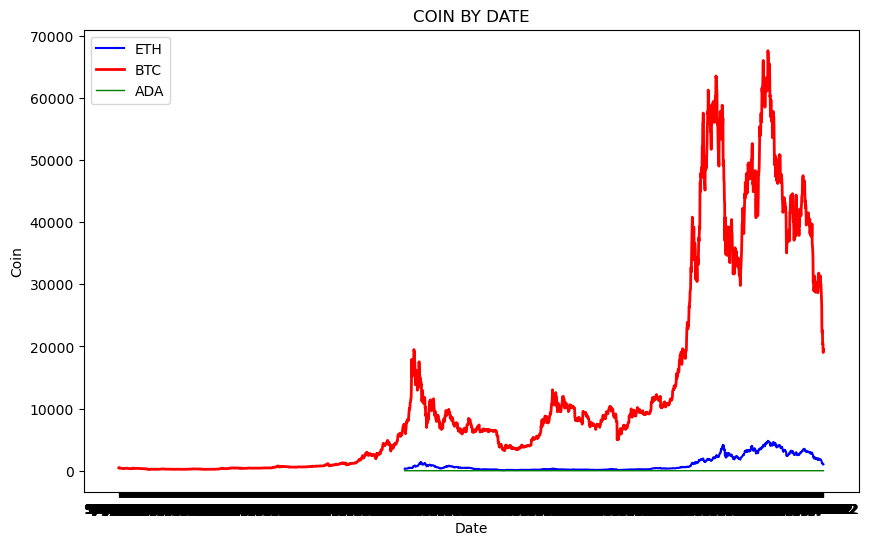

In [170]:
#1st way

plt.figure(figsize=(10,6)) 

plt.plot(investments_df.Date,investments_df.ETH, "b-",linewidth= 1.5, label = "ETH") 
plt.plot(investments_df.Date, investments_df.BTC, "r", lw= 2, label = "BTC")
plt.plot(investments_df.Date, investments_df.ADA , "g",lw= 1, label = "ADA")
plt.xlabel ("Date")
plt.ylabel("Coin")
plt.legend(loc = "upper left")
plt.title("COIN BY DATE");

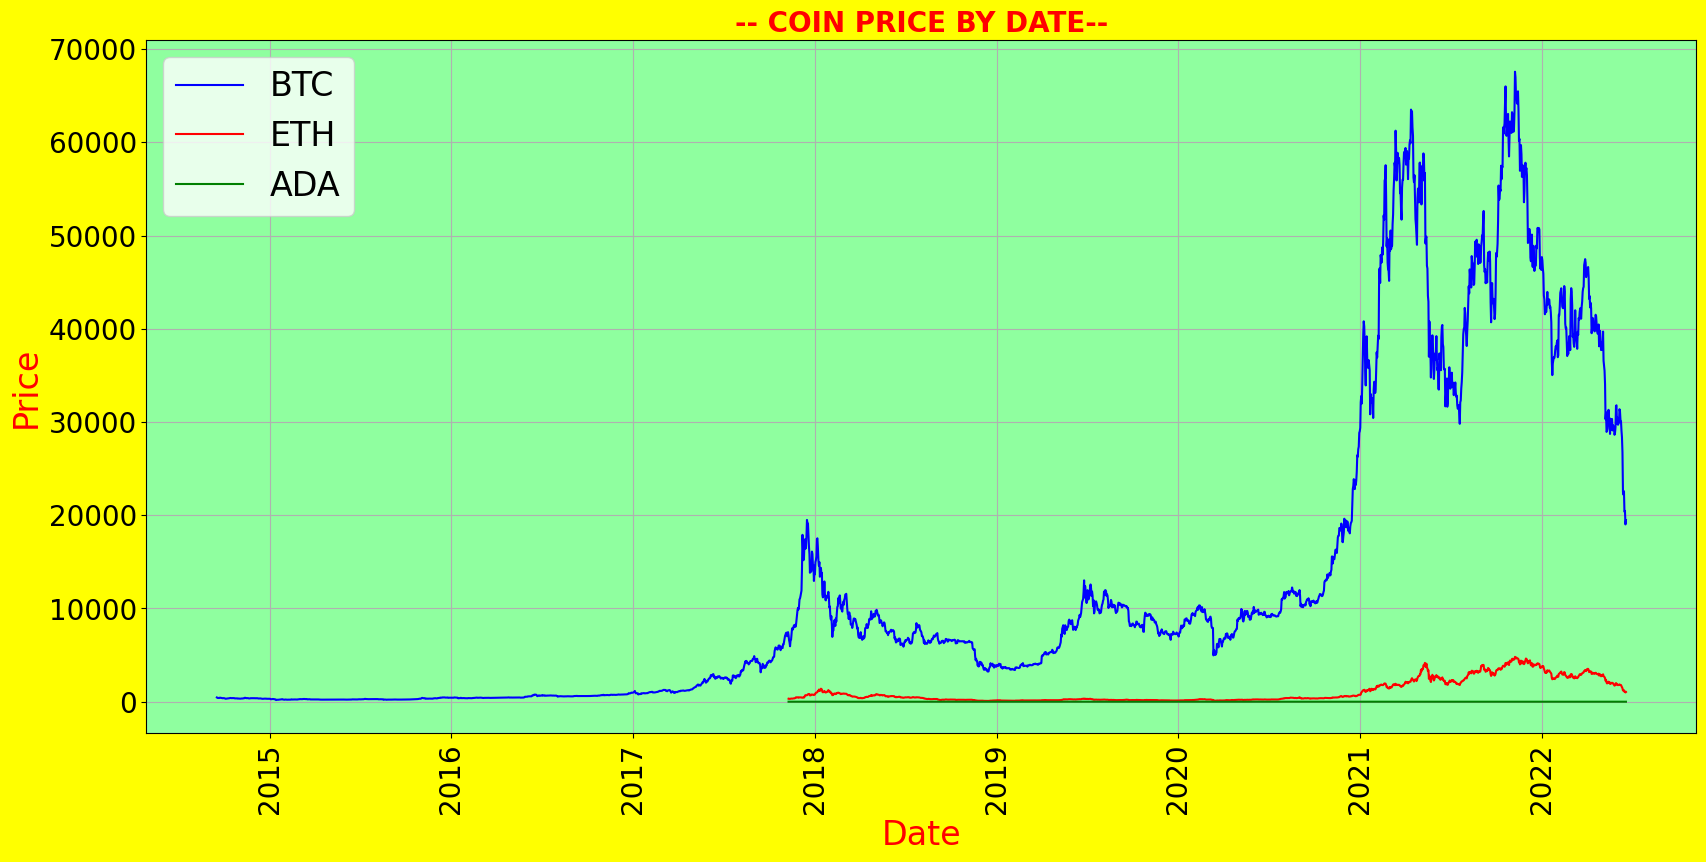

In [198]:
#2nd way

plt.figure(facecolor = "yellow", figsize = (20, 9))

ax = plt.axes()
ax.set_facecolor("xkcd:mint green")

plt.plot(investments_df.index, investments_df.BTC, "b-", label = "BTC")
plt.plot(investments_df.index, investments_df.ETH, "r-", label = "ETH")
plt.plot(investments_df.index, investments_df.ADA, "g-", label = "ADA")

plt.xticks(rotation = 90, fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel ("Date", fontsize=24, color="red")
plt.ylabel("Price", fontsize=24, color="red")
plt.legend(loc = "upper left", fontsize=24)
plt.grid()
plt.title("-- COIN PRICE BY DATE--", fontsize=20, color="red", fontweight="bold");

**PRACTICE OPPORTUNITY #2:**
- **Use subplots attribute to plot separate figures for BTC, ETH, and ADA**

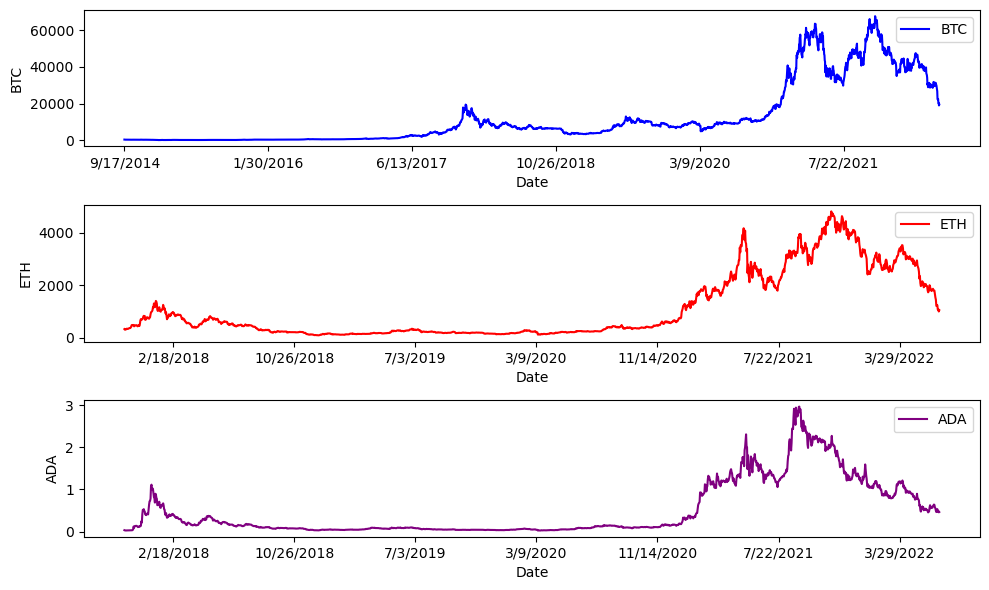

In [102]:
fig, ax = plt.subplots(3,1, figsize= (10,6))

investments_df.plot(x="Date", y="BTC",color="b" ,ax=ax[0])
ax[0].set_ylabel('BTC')
investments_df.plot(x="Date", y="ETH",color="r" , ax=ax[1])
ax[1].set_ylabel('ETH')
investments_df.plot(x="Date", y="ADA",color="purple" , ax=ax[2])
ax[2].set_ylabel('ADA')

plt.xlabel("Date")

plt.tight_layout()
plt.show()

## CODING TASK #3. PLOT SCATTERPLOTS USING MATPLOTLIB
- **Read daily return data using pandas**
- **Plot Daily returns of BTC vs. ETH**

In [103]:
daily_return_df = pd.read_csv('crypto_daily_returns.csv')
daily_return_df

Date       BTC        ETH        ADA
0     9/17/2014  0.000000   0.000000   0.000000
1     9/18/2014 -7.192558        NaN        NaN
2     9/19/2014 -6.984264        NaN        NaN
3     9/20/2014  3.573492        NaN        NaN
4     9/21/2014 -2.465854        NaN        NaN
...         ...       ...        ...        ...
2828  6/15/2022  1.648355   1.778018  10.097317
2829  6/16/2022 -9.707194 -13.418330 -10.927140
2830  6/17/2022  0.440750   1.759673   2.604094
2831  6/18/2022 -7.101781  -8.548629  -6.403471
2832  6/19/2022  2.477931   4.717365   1.737703

[2833 rows x 4 columns]

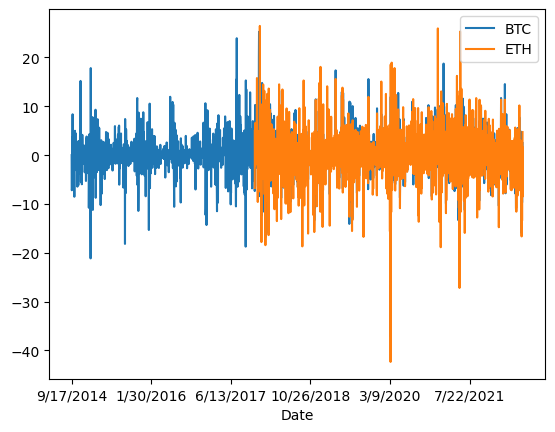

In [104]:
daily_return_df.plot(x="Date", y=["BTC", "ETH"])
plt.show()

In [223]:
plt.figure(figsize=(10,5))

colors = ['red', 'green']

sns.scatterplot(x = "BTC", y = "ETH", data = daily_return_df, s=75, hue=colors)

plt.show();

ValueError: Length of list vectors must match length of `data` when both are used, but `data` has length 2833 and the vector passed to `hue` has length 2.

<Figure size 1000x500 with 0 Axes>

**PRACTICE OPPORTUNITY #3:**
- **Plot the daily returns of BTC vs. ADA, choose your favourite color!**

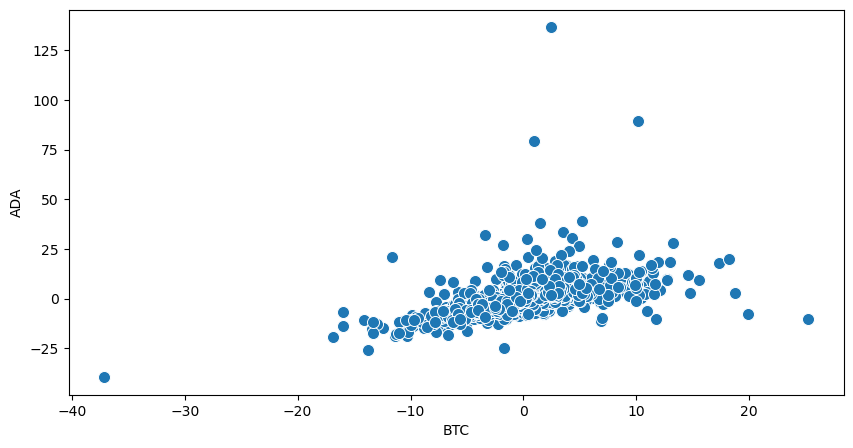

In [218]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=daily_return_df, x="BTC", y="ADA", s=75, palette="plasma")
plt.show()

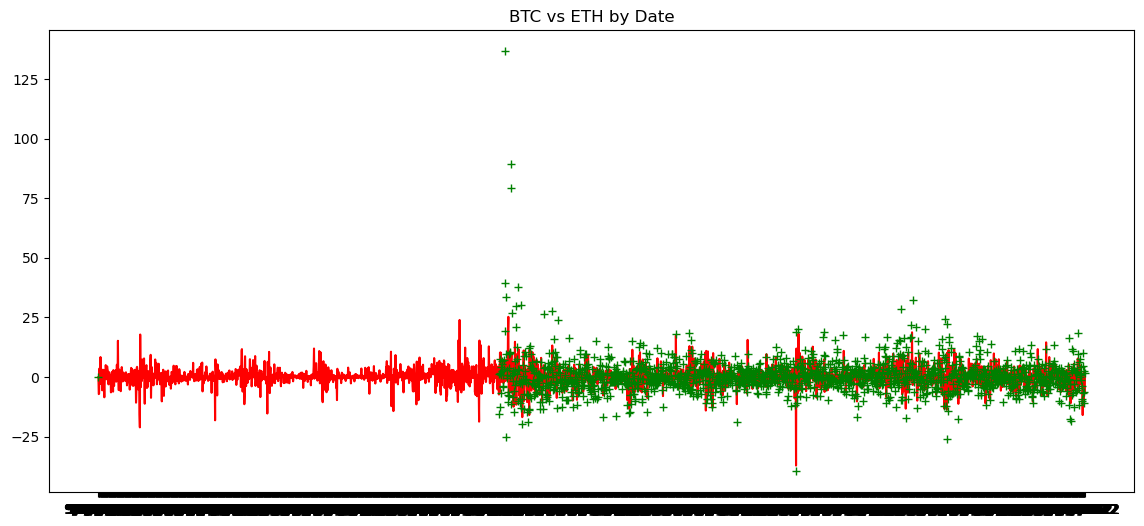

In [107]:
plt.figure(figsize=(14,6))

plt.plot(daily_return_df.Date, daily_return_df.BTC, "r-", lw= 1.5, label = "BTC")
plt.plot(daily_return_df.Date, daily_return_df.ADA , "g+",lw= 1, label = "ADA")

plt.title("BTC vs ETH by Date")
plt.show()

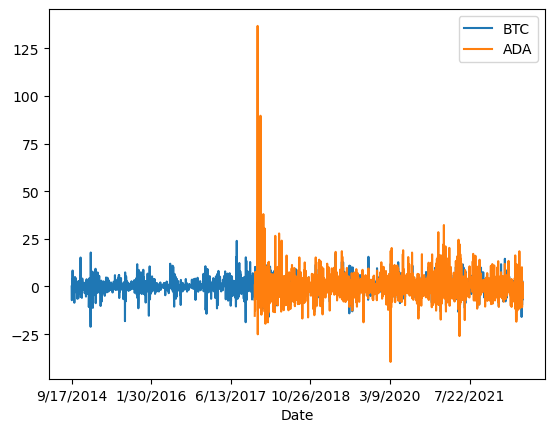

In [237]:
#2nd way

daily_return_df.plot(x="Date", y=["BTC", "ADA"])
plt.show()

## CODING TASK #4. PLOT HISTOGRAMS USING MATPLOTLIB
- **A histogram represents data using bars with various heights**
- **Each bar groups numbers into specific ranges**
- **Taller bars show that more data falls within that specific range**
- **Plot the histogram of the returns**

In [108]:
daily_return_df = pd.read_csv('crypto_daily_returns.csv')
daily_return_df

Date       BTC        ETH        ADA
0     9/17/2014  0.000000   0.000000   0.000000
1     9/18/2014 -7.192558        NaN        NaN
2     9/19/2014 -6.984264        NaN        NaN
3     9/20/2014  3.573492        NaN        NaN
4     9/21/2014 -2.465854        NaN        NaN
...         ...       ...        ...        ...
2828  6/15/2022  1.648355   1.778018  10.097317
2829  6/16/2022 -9.707194 -13.418330 -10.927140
2830  6/17/2022  0.440750   1.759673   2.604094
2831  6/18/2022 -7.101781  -8.548629  -6.403471
2832  6/19/2022  2.477931   4.717365   1.737703

[2833 rows x 4 columns]

In [109]:
mu = round(daily_return_df['BTC'].mean(), 2) # mean of distribution
sigma = round(daily_return_df['BTC'].std(), 2) # standard deviation of distribution
 
num_bins = 40

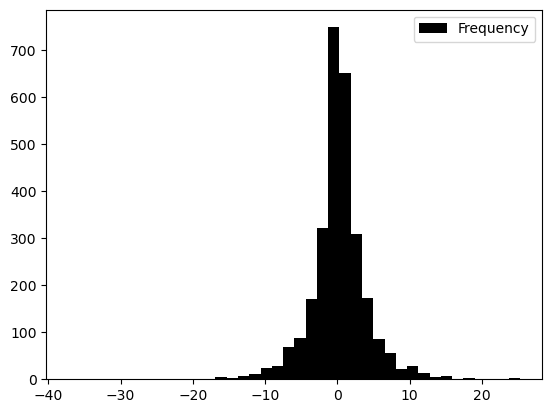

In [110]:
plt.hist(daily_return_df['BTC'],num_bins,
         color = "black", label = "Frequency")   
plt.legend()                                         
plt.show()

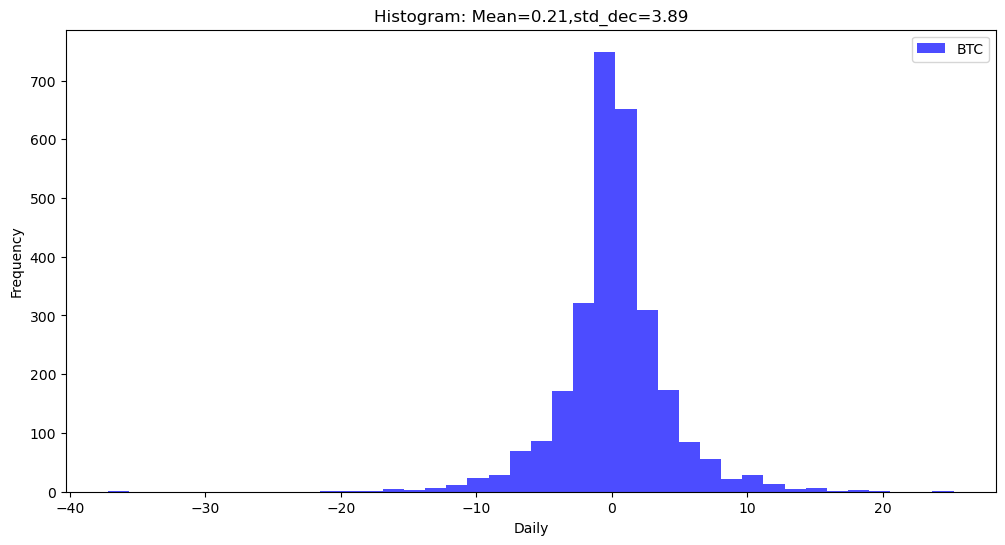

In [111]:
plt.figure(figsize=(8,6))

daily_return_df['BTC'].plot.hist(bins = num_bins, color = 'b', alpha = 0.7, figsize = (12, 6))

plt.xlabel("Daily")
plt.ylabel("Frequency")
plt.title("Histogram: Mean=" + str(mu) + ",std_dec=" + str(sigma))
plt.legend()

plt.show()

**PRACTICE OPPORTUNITY #4:**
- **Plot the histogram for BTC and ETH returns using 60 bins. Display all histograms on the same figure**


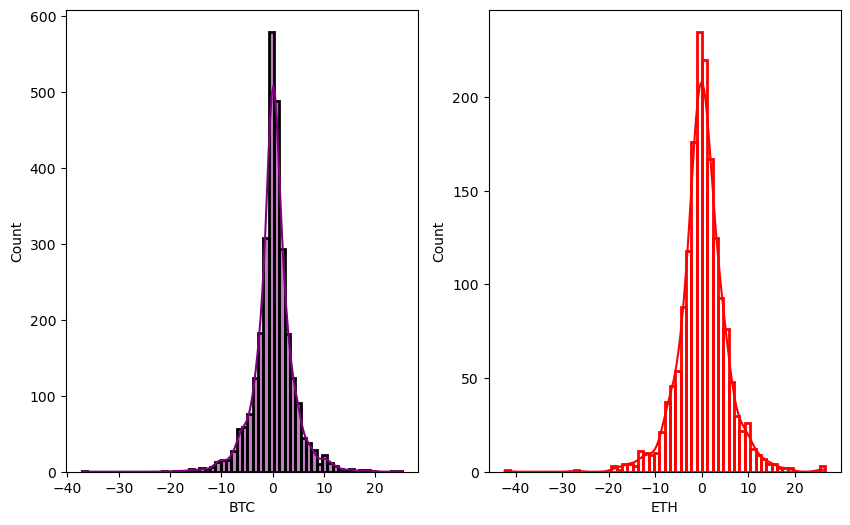

In [256]:
#we will look in seperate plots

fig, ax = plt.subplots(1,2, figsize= (10,6))

sns.histplot(data = daily_return_df, x = daily_return_df.BTC, linewidth = 2, kde = True, 
             color="purple", bins=60, ax= ax[0] )

sns.histplot(data = daily_return_df, x = daily_return_df.ETH, fill = False, linewidth = 2, kde = True, 
             color="red", bins=60, ax=ax[1])

plt.show()

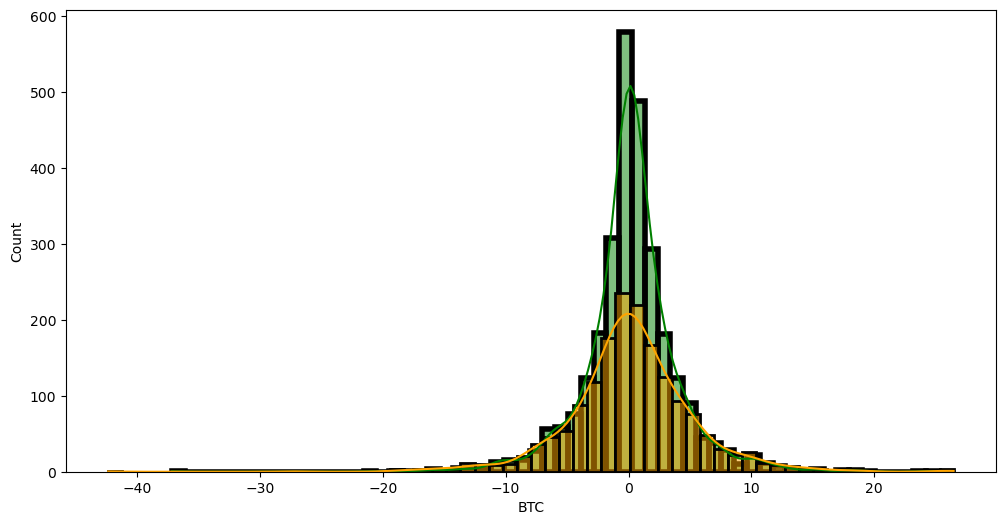

In [238]:
#we will look in a united plot

plt.figure(figsize=(12,6))

sns.histplot(data = daily_return_df, x = daily_return_df.BTC, linewidth = 4, kde = True, color="green", bins=60)
sns.histplot(data = daily_return_df, x = daily_return_df.ETH, linewidth = 2, kde = True, color="orange", bins=60)

plt.show()

## CODING TASK #5. PLOT SCATTERPLOT & COUNTPLOT USING SEABORN
- **Seaborn is a visualization library that sits on top of matplotlib**
- **Seaborn offers enhanced features compared to matplotlib**
- **https://seaborn.pydata.org/examples/index.html*/*
- **Check out the head of the dataframe**
- **Check out the tail of the dataframe**
- **Plot scatter plot between mean area and mean smoothness**
- **Let's print out countplot to know how many samples belong to class #0 and #1**

In [114]:
# import libraries 
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns # Statistical data visualization

In [115]:
# Import Cancer data 
cancer_df = pd.read_csv('cancer.csv')
cancer_df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  radius error  texture error  perimeter error  \
0                 0.07871        1.0950         0.9053            8.589   
1                 0.05667        0.5435         0.7339            3.398   
2                 0.05999        0.7456         0.7869            4.585   
3                 0.09744        0.4956         1.1560            3.445   
4                 0.05883        0.7572         0.7813            5.438   

   area error  smoothness error  compactness error  concavity error  \
0      153.40          0.006399            0.04904          0.05373   
1       74.08          0.005225            0.01308          0.01860   
2       94.03          0.006150            0.04006          0.03832   
3       27.23          0.009110            0.07458          0.05661   
4       94.44          0.011490            0.02461          0.05688   

   concave points error  symmetry error  fractal dimension error  \
0               0.01587         0.03003                 0.006193   
1               0.01340         0.01389                 0.003532   
2               0.02058         0.02250                 0.004571   
3               0.01867         0.05963                 0.009208   
4               0.01885         0.01756                 0.005115   

   worst radius  worst texture  worst perimeter  worst area  worst smoothness  \
0         25.38          17.33           184.60      2019.0            0.1622   
1         24.99          23.41           158.80      1956.0            0.1238   
2         23.57          25.53           152.50      1709.0            0.1444   
3         14.91          26.50            98.87       567.7            0.2098   
4         22.54          16.67           152.20      1575.0            0.1374   

   worst compactness  worst concavity  worst concave points  worst symmetry  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   worst fractal dimension  target  
0                  0.11890       0  
1                  0.08902       0  
2                  0.08758       0  
3                  0.17300       0  
4                  0.07678       0

In [116]:
cancer_df.tail()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  radius error  texture error  perimeter error  \
564                 0.05623        1.1760          1.256            7.673   
565                 0.05533        0.7655          2.463            5.203   
566                 0.05648        0.4564          1.075            3.425   
567                 0.07016        0.7260          1.595            5.772   
568                 0.05884        0.3857          1.428            2.548   

     area error  smoothness error  compactness error  concavity error  \
564      158.70          0.010300            0.02891          0.05198   
565       99.04          0.005769            0.02423          0.03950   
566       48.55          0.005903            0.03731          0.04730   
567       86.22          0.006522            0.06158          0.07117   
568       19.15          0.007189            0.00466          0.00000   

     concave points error  symmetry error  fractal dimension error  \
564               0.02454         0.01114                 0.004239   
565               0.01678         0.01898                 0.002498   
566               0.01557         0.01318                 0.003892   
567               0.01664         0.02324                 0.006185   
568               0.00000         0.02676                 0.002783   

     worst radius  worst texture  worst perimeter  worst area  \
564        25.450          26.40           166.10      2027.0   
565        23.690          38.25           155.00      1731.0   
566        18.980          34.12           126.70      1124.0   
567        25.740          39.42           184.60      1821.0   
568         9.456          30.37            59.16       268.6   

     worst smoothness  worst compactness  worst concavity  \
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     worst concave points  worst symmetry  worst fractal dimension  target  
564                0.2216          0.2060                  0.07115       0  
565                0.1628          0.2572                  0.06637       0  
566                0.1418          0.2218                  0.07820       0  
567                0.2650          0.4087                  0.12400       0  
568                0.0000          0.2871                  0.07039       1

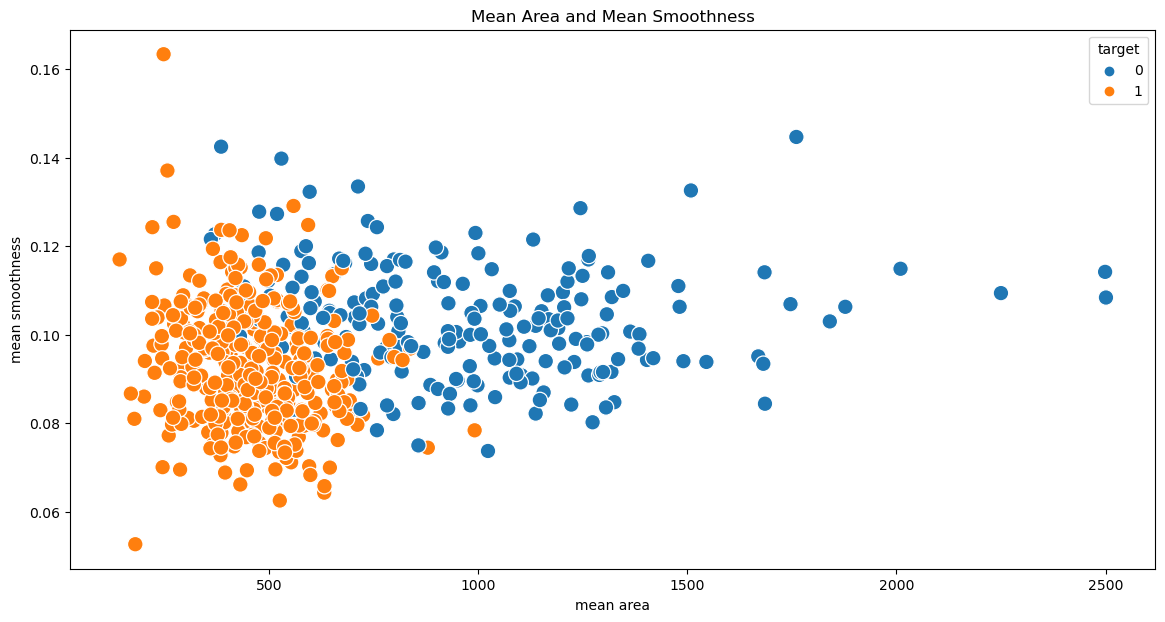

In [247]:
plt.figure(figsize=(14,7))

sns.scatterplot(data=cancer_df,x="mean area", y="mean smoothness", hue="target", s=125)
plt.title('Mean Area and Mean Smoothness')
plt.show()

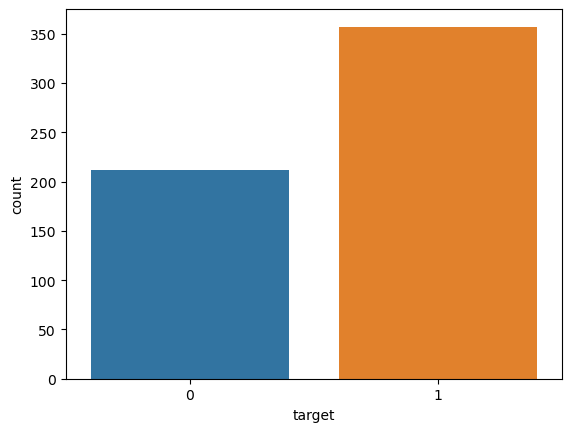

In [118]:
sns.countplot(data=cancer_df, x="target");

**PRACTICE OPPORTUNITY #5:**
- **Plot the scatterplot between the mean radius and mean area. Comment on the plot** 


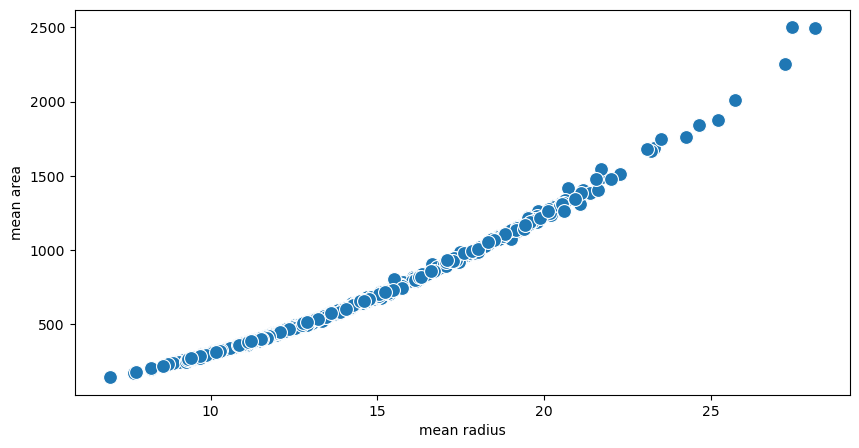

In [249]:
plt.figure(figsize = (10, 5))
sns.scatterplot(data=cancer_df, x="mean radius", y="mean area", s=100);

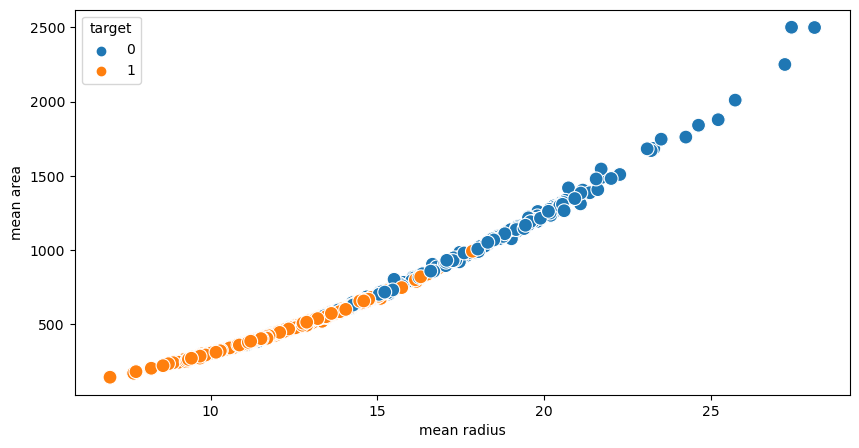

In [250]:
plt.figure(figsize = (10, 5))
sns.scatterplot(data=cancer_df, x="mean radius", y="mean area", hue="target", s=100);

***carcer rate is increasing when mean radius approximately lower than 16 and mean are is lower then 750***

## CODING TASK #6. PLOT PAIRPLOT, DISPLOT, AND HEATMAPS/CORRELATIONS USING SEABORN

- **Plot the pairplot**
- **Strong correlation between the mean radius and mean perimeter, mean area and mean primeter**
- **plot the distplot** 
- **Displot combines matplotlib histogram function with kdeplot() (Kernel density estimate)**
- **KDE is used to plot the Probability Density of a continuous variable.** 

In [121]:
# sns.pairplot(data=cancer_df,plot_kws={'alpha':0.3},palette='autumn_r')
# plt.show()

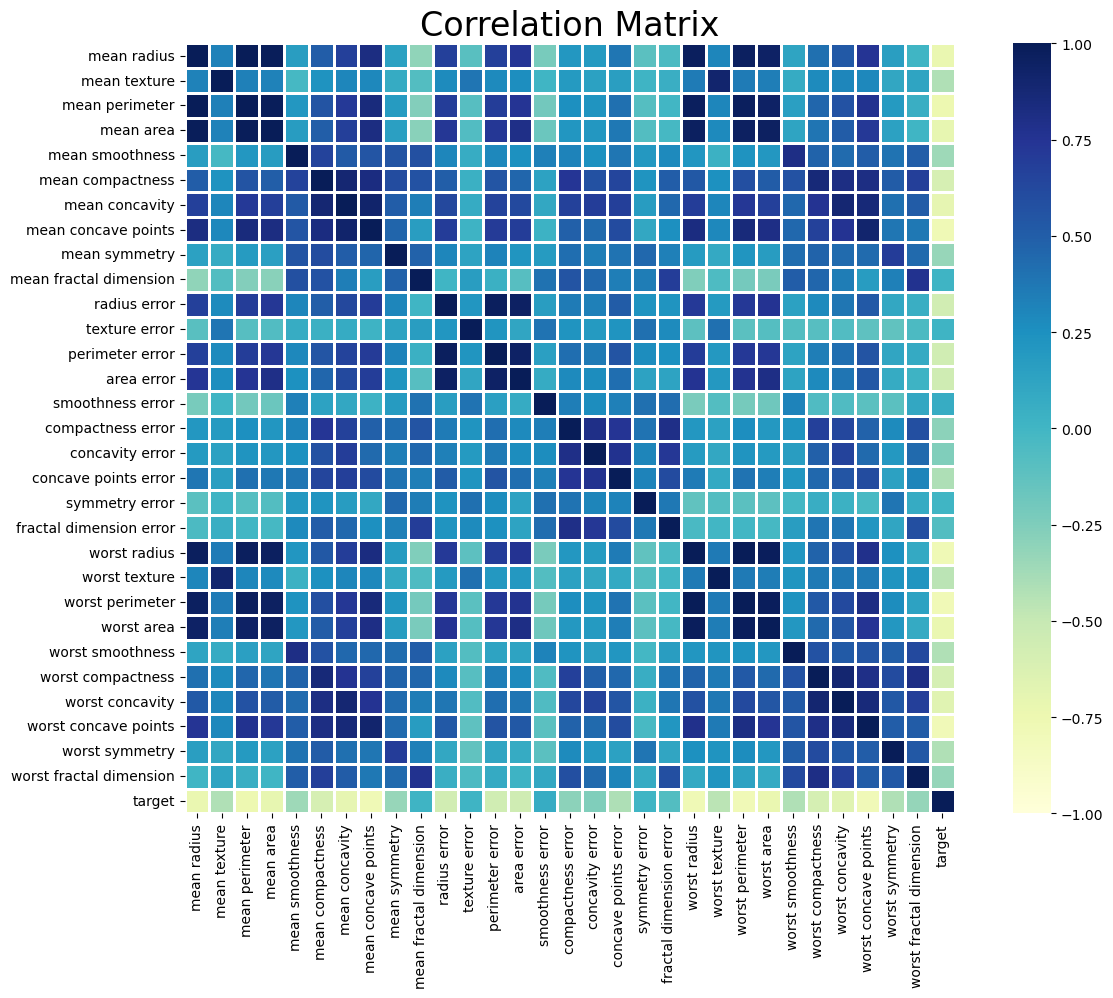

In [253]:
plt.figure(figsize=(15,10))

sns.heatmap(cancer_df.corr(), annot=False, cmap='YlGnBu', square=True, linewidths=.8, vmin=-1, vmax=1)
plt.title("Correlation Matrix", fontsize=24);

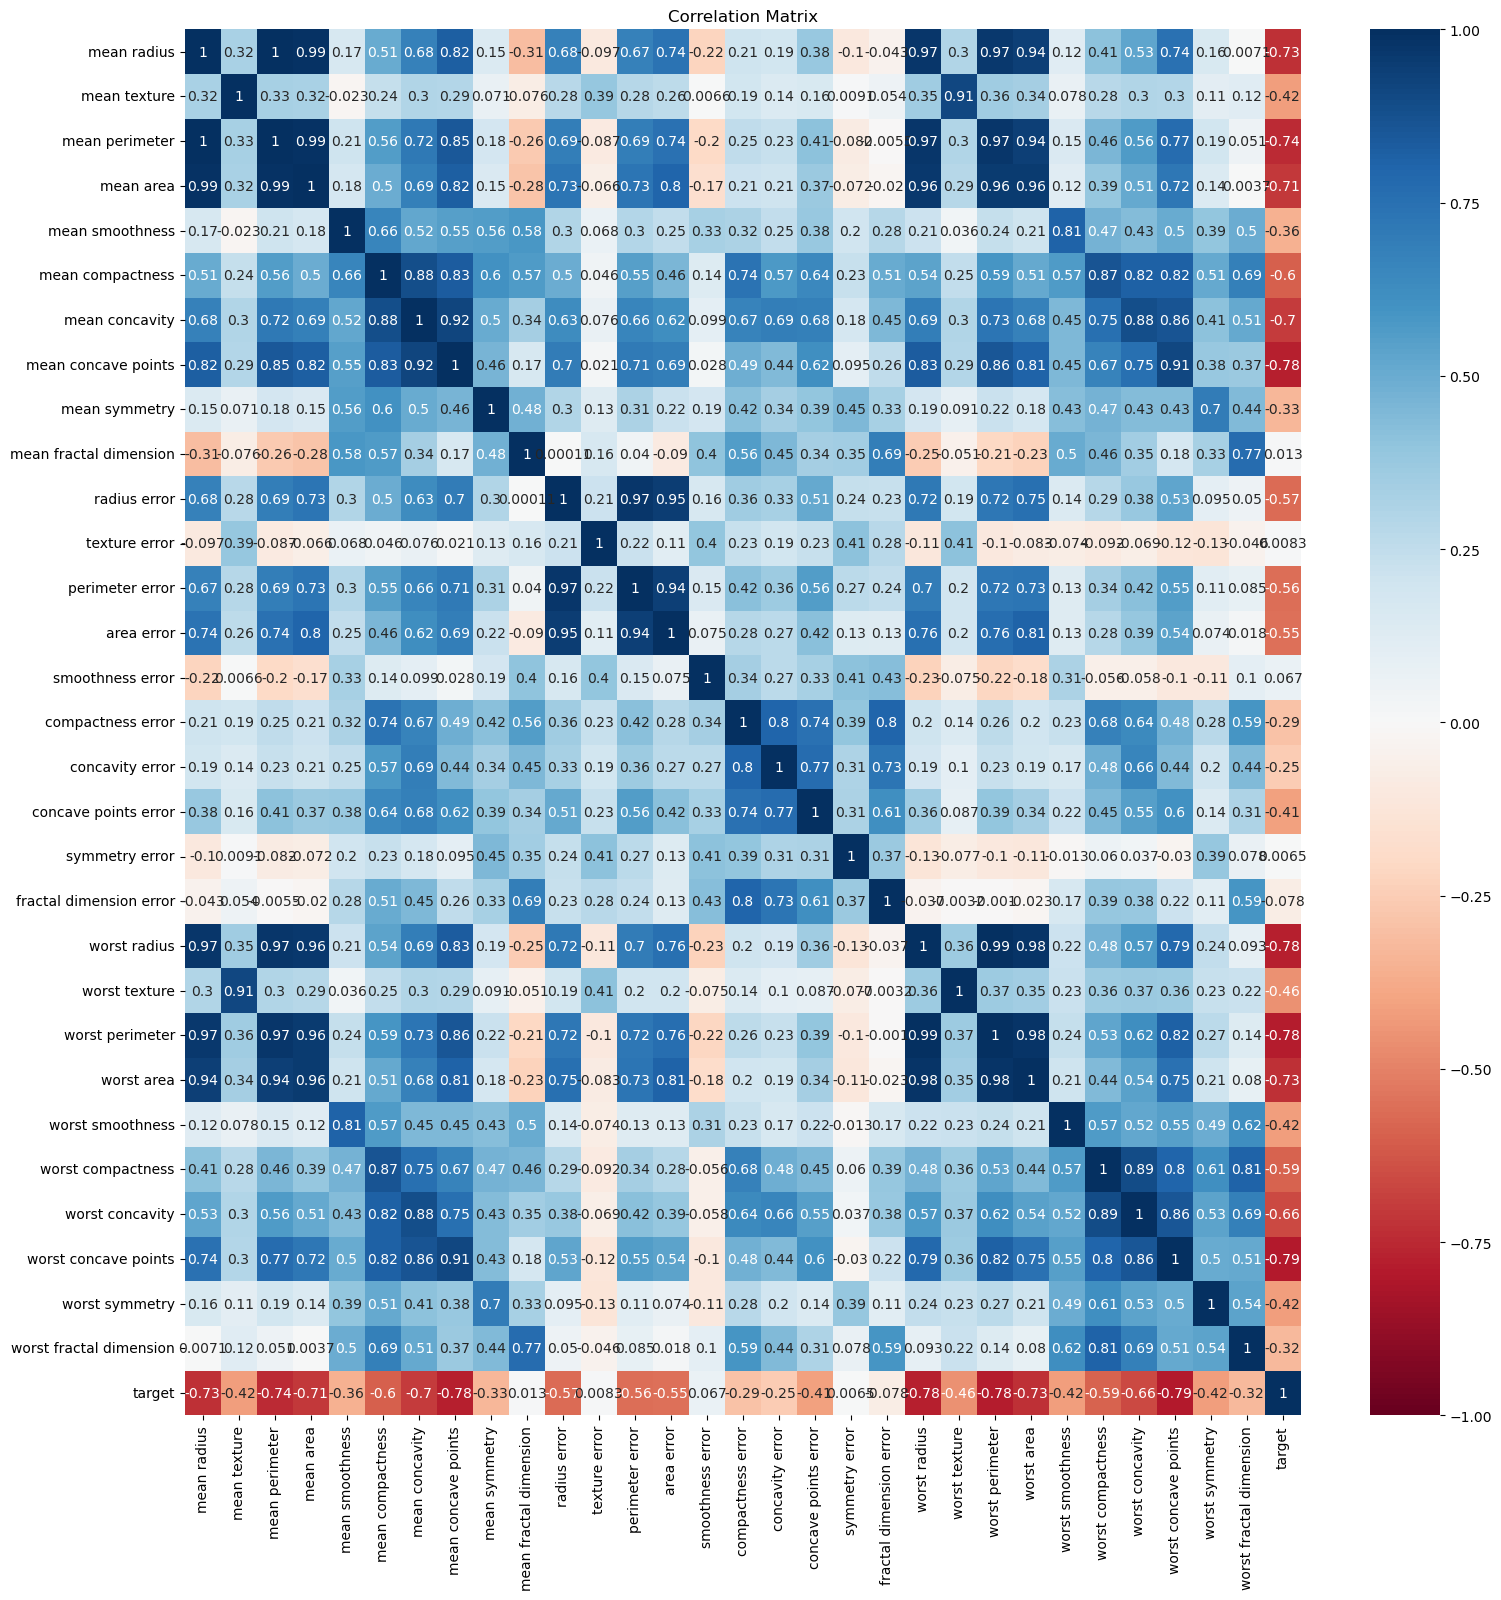

In [260]:
#2nd way different coloring

plt.figure(figsize=(18,18))
sns.heatmap(cancer_df.corr(), cmap='RdBu', annot=True, vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

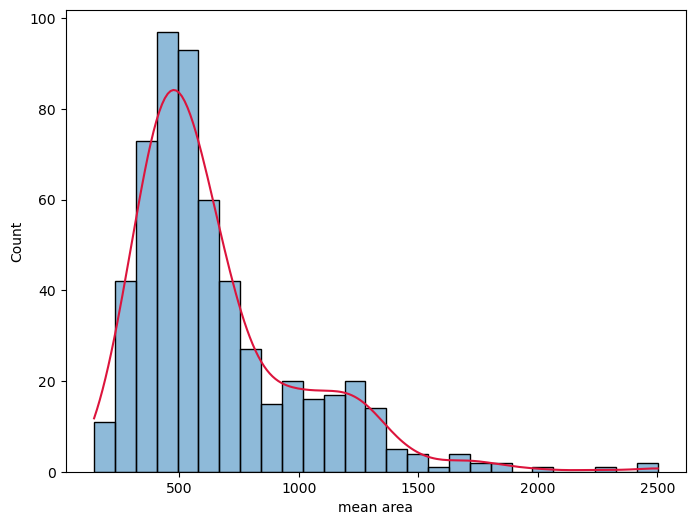

In [259]:
#kde color can be different - just to know

plt.figure(figsize=(8,6))
ax = sns.histplot(data=cancer_df, x="mean area", kde=True)
ax.lines[0].set_color('crimson')

**PRACTICE OPPORTUNITY #6:**
- **Plot two separate distplot for each target class #0 and target class #1**


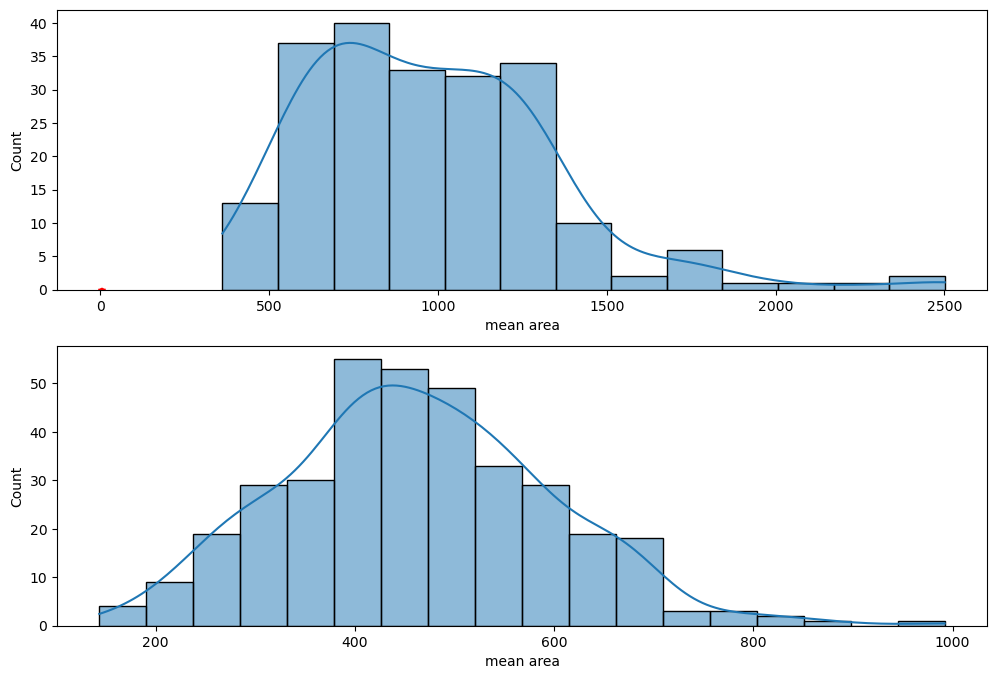

In [282]:
fig, ax = plt.subplots(2,1, figsize=(12,8))

sns.histplot(data = cancer_df[cancer_df.target == 0], x="mean area", kde=True, ax=ax[0])


sns.histplot(data = cancer_df[cancer_df.target == 1], x="mean area", kde=True, ax=ax[1])
plt.show()

# EXCELLENT JOB!

# FINAL CAPSTONE PROJECT 

- In this project, we will visualize stock prices using Seaborn and Matplotlib. 4 Stocks are considered including JP Morgan Chase (JP), Procter and Gamble (P&G) (PG), Apple (AAPL) and United Airlines (UAL).
- Using the stock_daily_prices.csv and stocks_daily_returns.csv dataset included in the course/workshop package, please do the following:
    - Import both datasets using Pandas.
    - Using Matplotlib, plot lineplots that display all 4 stocks daily prices on one single figure.
    - Using Matplotlib, plot 4 stocks daily prices on multiple subplots.
    - Using Matplotlib, plot the 4 plots on subplots next to each other (all figures in one row).
    - Using Matplotlib, plot the scatterplot between Apple and JP Morgan daily returns. 
    - Using Seaborn, plot similar scatterplot between Apple and JP Morgan daily returns. 
    - Assume that you decided to become bullish on AAPL and you allocated 70% of your assets in it. You also decided to equally divide the rest of your assets in other stocks (JPM, PG, and UAL). Using Matplotlib, plot a pie chart that shows these allocations. Use 'explode’ attribute to increase the separation between AAPL and the rest of the portfolio.
    - Using Matplotlib, plot the histogram for United Airlines and P&G returns using 40 bins with red color. Display the mean and Standard deviation for both stocks on top of the figure. What did you conclude from this graph?
    - Using Seaborn, plot a heatmap that shows the correlations between stocks daily returns. Comment on the correlation between UAL and P&G.
    - Plot a 3D plot showing all daily returns from JPM, AAPL and UAL [External Research is required].

In [283]:
df_prices = pd.read_csv("stocks_daily_prices.csv")
df_returns = pd.read_csv("stocks_daily_returns.csv")

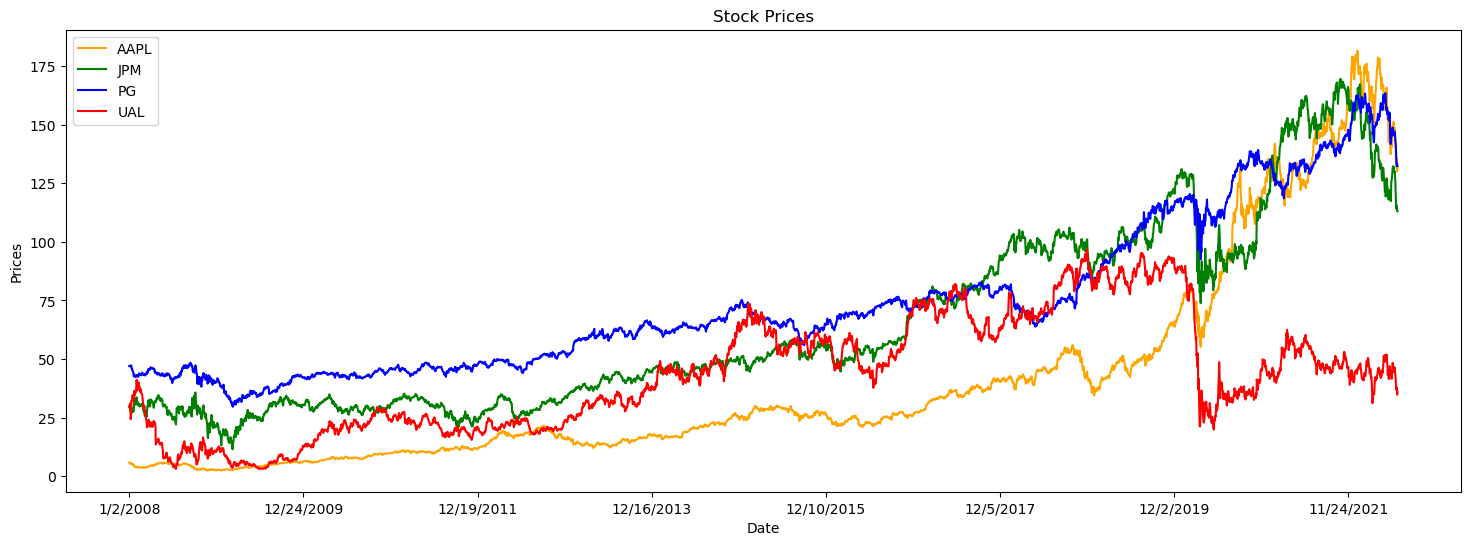

In [293]:

df_prices.plot(x = 'Date', y = ['AAPL', 'JPM', 'PG','UAL'], 
               label = ['AAPL', 'JPM', 'PG','UAL'], 
               subplots = False, figsize = (18, 6), 
               color = ['orange', 'green', 'blue','red'])
plt.xlabel('Date')
plt.ylabel('Prices')
plt.title('Stock Prices')
plt.legend(loc = 'upper left');

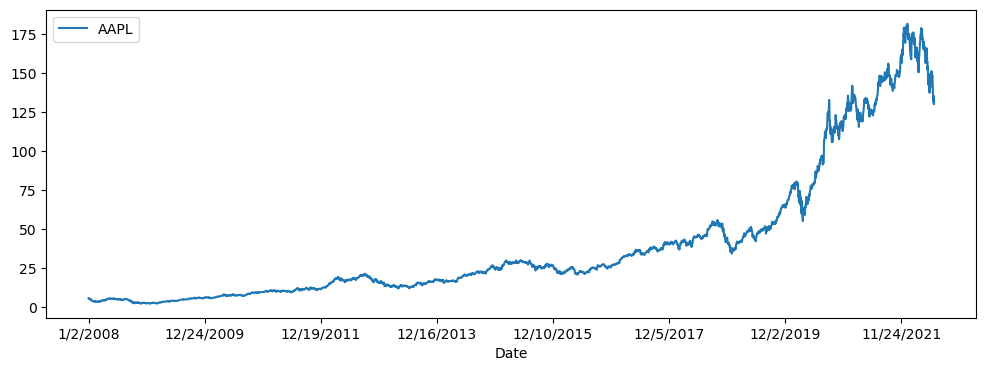

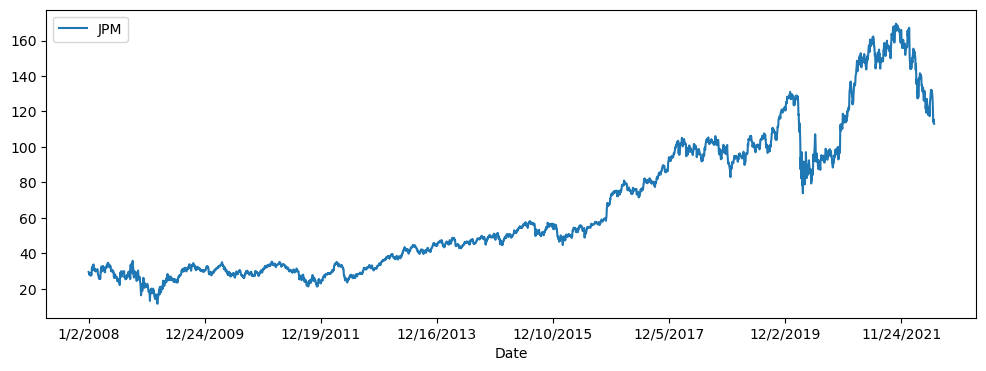

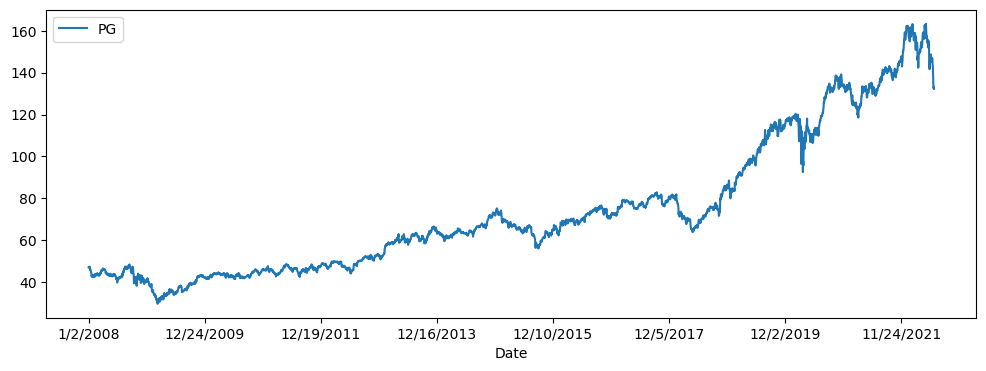

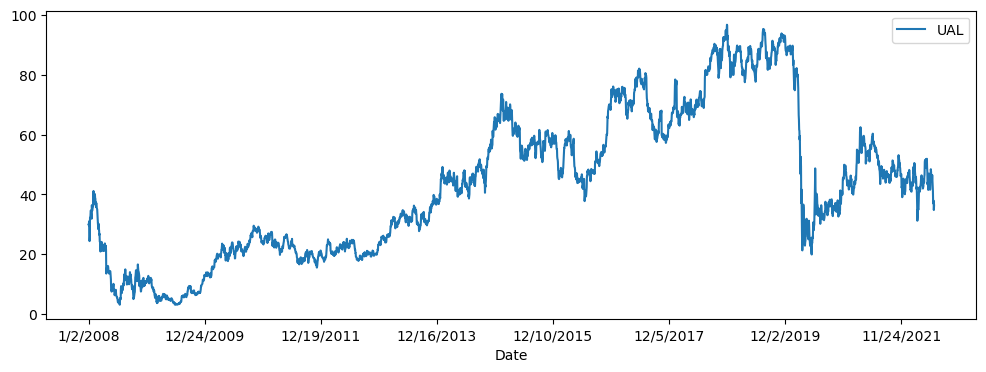

In [294]:
stocks = ['AAPL', 'JPM', 'PG', 'UAL'] 

for i in stocks:
    df_prices.plot(x = 'Date', y = i, label = i, figsize = (12, 4))
    plt.show()

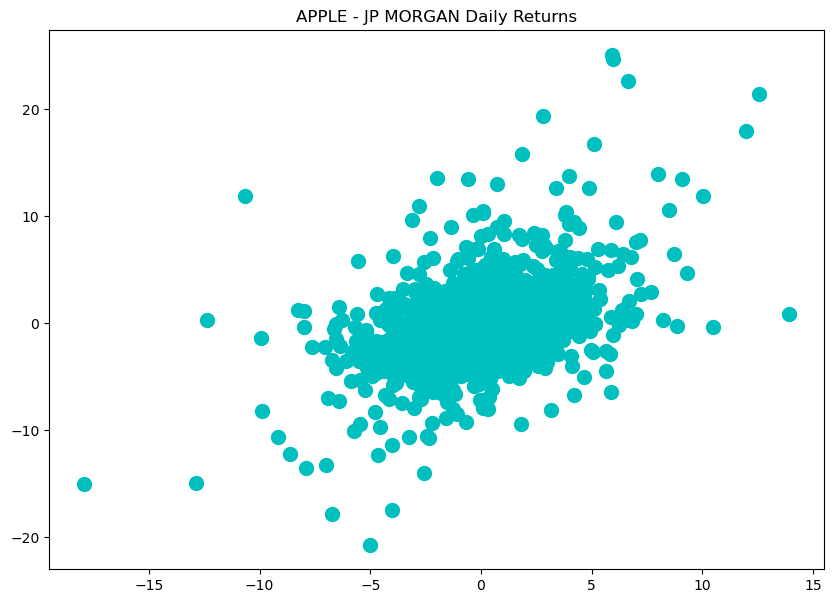

In [298]:
plt.figure(figsize=(10, 7))

plt.scatter(x = df_returns.AAPL, y = df_returns.JPM, color = "c", s=100)
plt.title("APPLE - JP MORGAN Daily Returns");

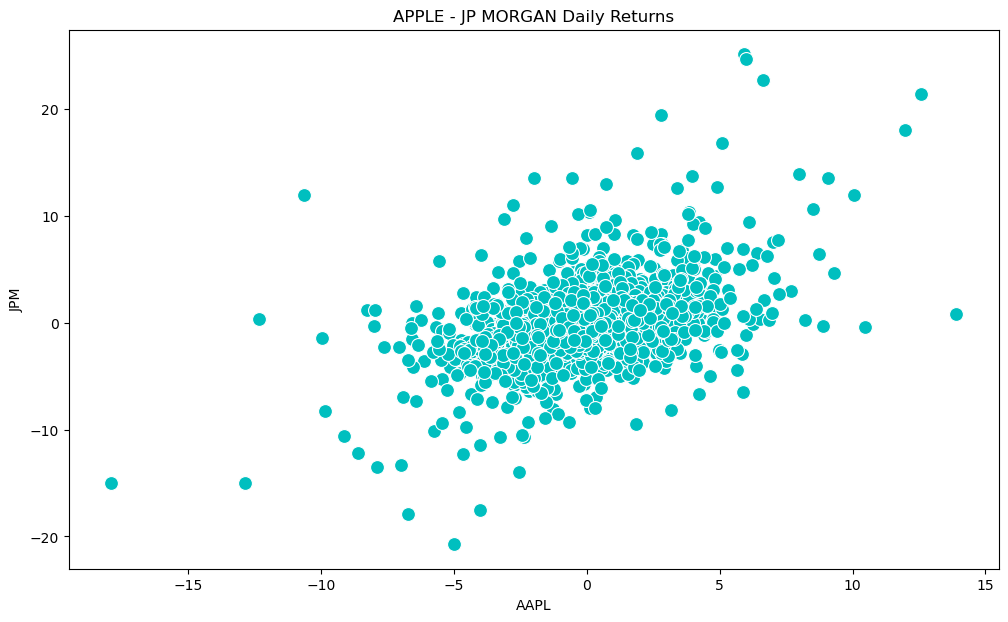

In [301]:
plt.figure(figsize=(12, 7))

sns.scatterplot(x = df_returns.AAPL, y = df_returns.JPM, color = "c", s=100)
plt.title("APPLE - JP MORGAN Daily Returns");

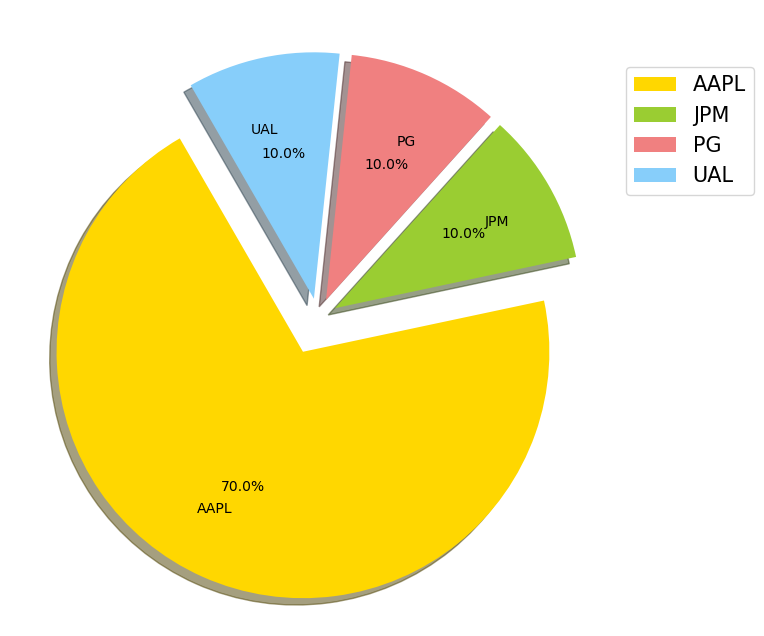

In [315]:
x = [70, 10, 10, 10]

label = ["AAPL", "JPM", "PG", "UAL"]

plt.figure(figsize=(14, 8))

color_list = ["gold", "yellowgreen", "lightcoral", "lightskyblue"]
explode_list = [0.15, 0.08, 0.08, 0.08]



plt.pie(x, labels = label, labeldistance = 0.7, autopct="%.1f%%", startangle = 120, shadow = True, pctdistance=0.6, 
        colors=color_list, explode = explode_list)

plt.legend(loc=(1,.7), fontsize=15)
plt.show()

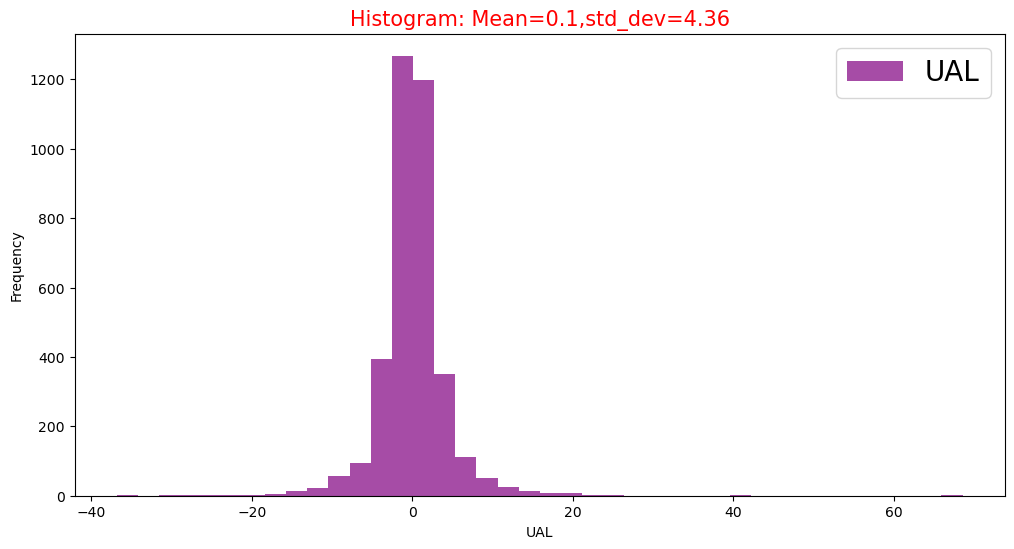

In [330]:
mu = round(df_returns['UAL'].mean(), 2) # mean of distribution
sigma = round(df_returns['UAL'].std(), 2) # standard deviation of distribution

plt.figure(figsize=(8,6))
df_returns['UAL'].plot.hist(bins = 40, color = 'purple', alpha = 0.7, figsize = (12, 6))
plt.xlabel("UAL")
plt.ylabel("Frequency")
plt.title("Histogram: Mean=" + str(mu) + ",std_dev=" + str(sigma),color="red", fontweight=12, fontsize=15)
plt.legend(fontsize=20)
plt.show()

# GREAT JOB!